In [5]:
!unzip /content/drive/MyDrive/image_dataset.zip

Archive:  /content/drive/MyDrive/image_dataset.zip
   creating: image_dataset/
   creating: image_dataset/not_trash/
  inflating: image_dataset/not_trash/0009ef760674b55d.jpg  
  inflating: image_dataset/not_trash/000be572efea5716.jpg  
  inflating: image_dataset/not_trash/0015637c10b94726.jpg  
  inflating: image_dataset/not_trash/0015ce0b0d6ac1d6.jpg  
  inflating: image_dataset/not_trash/0042f8a51964871a.jpg  
  inflating: image_dataset/not_trash/00953a3900fc8aa9.jpg  
  inflating: image_dataset/not_trash/00ba4f8b91d01af2.jpg  
  inflating: image_dataset/not_trash/00e8294040306679.jpg  
  inflating: image_dataset/not_trash/00ee55d1a724f58a.jpg  
  inflating: image_dataset/not_trash/00f63f17f0f16f34.jpg  
  inflating: image_dataset/not_trash/00fca8a2da7a4694.jpg  
  inflating: image_dataset/not_trash/0119c15fefb94aa7.jpg  
  inflating: image_dataset/not_trash/0151bd1bc09f95b5.jpg  
  inflating: image_dataset/not_trash/0152fe113f55f6c0.jpg  
  inflating: image_dataset/not_trash/015fbc

In [1]:
!pip install -q tflite-model-maker

     |████████████████████████████████| 194kB 11.5MB/s 
     |████████████████████████████████| 92kB 7.8MB/s 
     |████████████████████████████████| 5.5MB 15.3MB/s 
     |████████████████████████████████| 645kB 32.1MB/s 
     |████████████████████████████████| 849kB 27.5MB/s 
     |████████████████████████████████| 1.2MB 37.0MB/s 
     |████████████████████████████████| 1.0MB 40.7MB/s 
     |████████████████████████████████| 71kB 8.7MB/s 
     |████████████████████████████████| 174kB 45.1MB/s 
     |████████████████████████████████| 358kB 37.8MB/s 
     |████████████████████████████████| 706kB 36.6MB/s 
     |████████████████████████████████| 37.6MB 79kB/s 
     |████████████████████████████████| 102kB 11.8MB/s 
     |████████████████████████████████| 194kB 43.0MB/s 
ERROR: tensorflowjs 3.1.0 has requirement tensorflow-hub<0.10,>=0.7.0, but you'll have tensorflow-hub 0.11.0 which is incompatible.


In [2]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import configs
from tflite_model_maker import ExportFormat
from tflite_model_maker import image_classifier
from tflite_model_maker import ImageClassifierDataLoader
from tflite_model_maker import model_spec

import matplotlib.pyplot as plt

In [6]:
image_path = "image_dataset/"

In [7]:
data = ImageClassifierDataLoader.from_folder(image_path)

INFO:tensorflow:Load image with size: 1199, num_label: 2, labels: not_trash, trash.


In [8]:
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

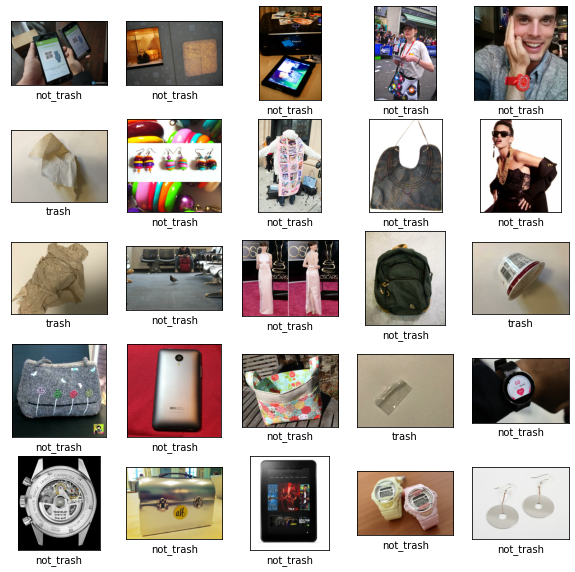

In [9]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [10]:
model = image_classifier.create(train_data, validation_data=validation_data)

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 3,415,586
Trainable params: 2,562
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5
29/29 [==============================] - 38s 1s/step - loss: 0.5015 - accuracy: 0.8026 - val_loss: 0.2304 - val_accuracy: 0.9792
Epoch 2/5
29/29 [==============================] - 31s 1s/step - loss: 0.2335 - accuracy: 0.9943 - val_loss: 0.2250 - val_accuracy: 1.0000
Epoch 3/5
29/29 [==============================]

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 3,415,586
Trainable params: 2,562
Non-trainable params: 3,413,024
_________________________________________________________________


In [12]:
loss, accuracy = model.evaluate(test_data)

4/4 [==============================] - 7s 751ms/step - loss: 0.2407 - accuracy: 0.9833


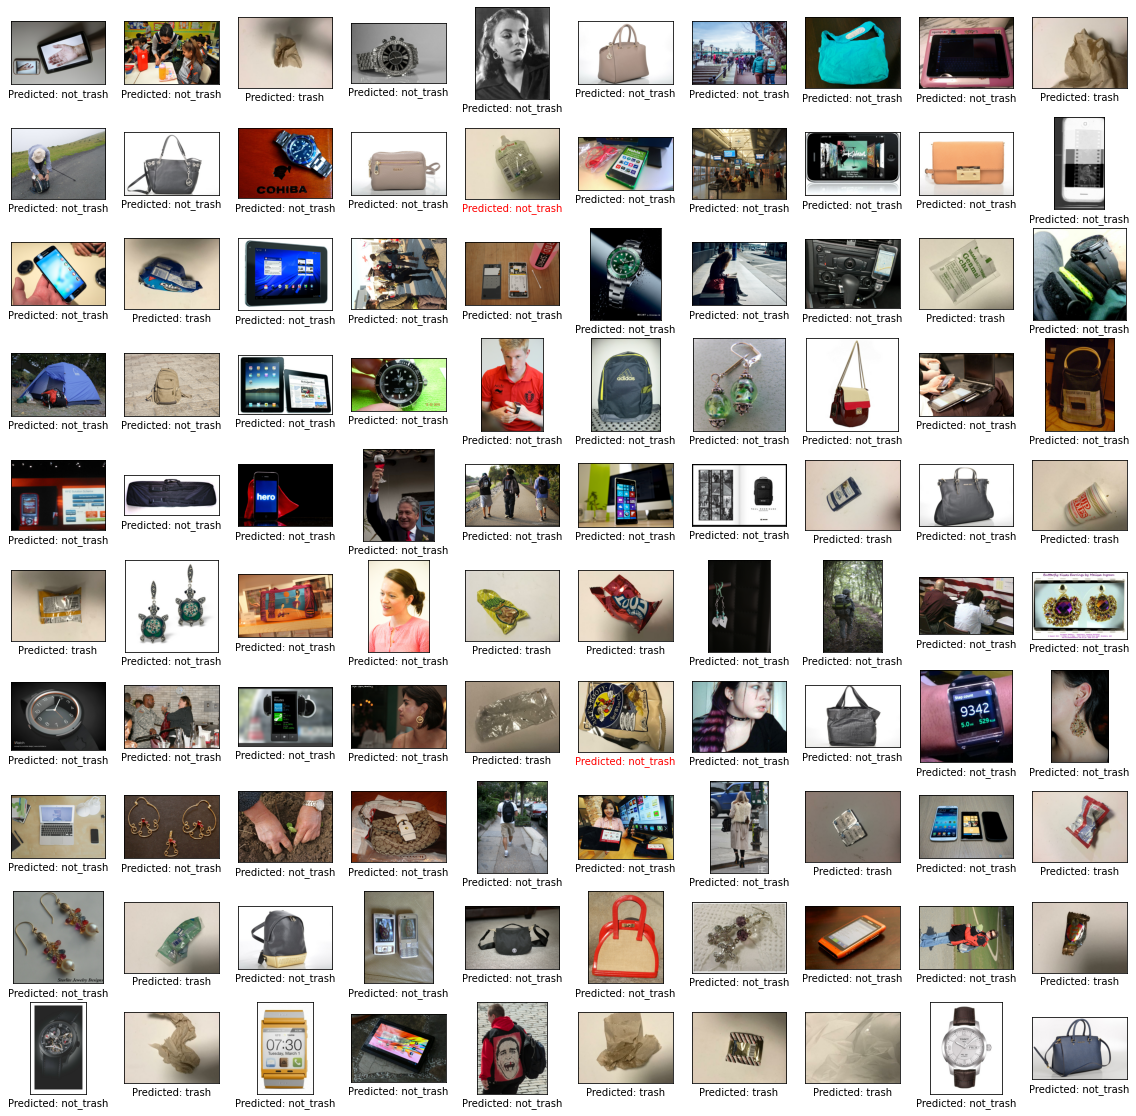

In [13]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  return 'black' if val1 == val2 else 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel(f"Predicted: {predict_label}")
plt.show()


In [14]:
model.export(export_dir='.')

INFO:tensorflow:Assets written to: /tmp/tmpcv9kvqf1/assets


INFO:tensorflow:Assets written to: /tmp/tmpcv9kvqf1/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpx5bl7oir/labels.txt.


INFO:tensorflow:Saving labels in /tmp/tmpx5bl7oir/labels.txt.


In [15]:
model.evaluate_tflite('model.tflite', test_data)

INFO:tensorflow:Processing example: #0
[[[[0.4392157  0.42745098 0.4       ]
   [0.4252101  0.41344538 0.39383754]
   [0.4        0.3971989  0.38039216]
   ...
   [0.30588236 0.29411766 0.26666668]
   [0.30588236 0.29411766 0.26666668]
   [0.29747915 0.29243693 0.2627451 ]]

  [[0.4384454  0.4272584  0.39961484]
   [0.42028812 0.40885356 0.3844888 ]
   [0.40528962 0.40888107 0.38607693]
   ...
   [0.29817677 0.28641206 0.25896108]
   [0.29873687 0.28697217 0.2595212 ]
   [0.2936775  0.2819128  0.25446182]]

  [[0.42706582 0.42706582 0.38785014]
   [0.4159714  0.41429073 0.3879602 ]
   [0.4177171  0.42163867 0.39866948]
   ...
   [0.30588236 0.29411766 0.26666668]
   [0.29589814 0.28413343 0.25668246]
   [0.2971288  0.2853641  0.2579131 ]]

  ...

  [[0.69861704 0.7064602  0.6946955 ]
   [0.7033938  0.71123695 0.69499046]
   [0.7025386  0.71038175 0.69172925]
   ...
   [0.6375173  0.6396284  0.62801063]
   [0.63610196 0.63773507 0.62788147]
   [0.6329531  0.63410866 0.6256877 ]]

  [[0.

INFO:tensorflow:Processing example: #0
[[[[0.4392157  0.42745098 0.4       ]
   [0.4252101  0.41344538 0.39383754]
   [0.4        0.3971989  0.38039216]
   ...
   [0.30588236 0.29411766 0.26666668]
   [0.30588236 0.29411766 0.26666668]
   [0.29747915 0.29243693 0.2627451 ]]

  [[0.4384454  0.4272584  0.39961484]
   [0.42028812 0.40885356 0.3844888 ]
   [0.40528962 0.40888107 0.38607693]
   ...
   [0.29817677 0.28641206 0.25896108]
   [0.29873687 0.28697217 0.2595212 ]
   [0.2936775  0.2819128  0.25446182]]

  [[0.42706582 0.42706582 0.38785014]
   [0.4159714  0.41429073 0.3879602 ]
   [0.4177171  0.42163867 0.39866948]
   ...
   [0.30588236 0.29411766 0.26666668]
   [0.29589814 0.28413343 0.25668246]
   [0.2971288  0.2853641  0.2579131 ]]

  ...

  [[0.69861704 0.7064602  0.6946955 ]
   [0.7033938  0.71123695 0.69499046]
   [0.7025386  0.71038175 0.69172925]
   ...
   [0.6375173  0.6396284  0.62801063]
   [0.63610196 0.63773507 0.62788147]
   [0.6329531  0.63410866 0.6256877 ]]

  [[0.

{'accuracy': 0.9833333333333333}

In [22]:
config = configs.QuantizationConfig.create_full_integer_quantization(representative_data=test_data, is_integer_only=True)

In [ ]:
# Appyling quantization on the model to reduce size and inference time
model.export(export_dir='.', tflite_filename='model_quant.tflite', label_filename="labels.txt", quantization_config=config)

INFO:tensorflow:Assets written to: /tmp/tmpt895kq2_/assets


INFO:tensorflow:Assets written to: /tmp/tmpt895kq2_/assets


In [18]:
model.evaluate_tflite('model_quant.tflite', test_data)

INFO:tensorflow:Processing example: #0
[[[[0.4392157  0.42745098 0.4       ]
   [0.4252101  0.41344538 0.39383754]
   [0.4        0.3971989  0.38039216]
   ...
   [0.30588236 0.29411766 0.26666668]
   [0.30588236 0.29411766 0.26666668]
   [0.29747915 0.29243693 0.2627451 ]]

  [[0.4384454  0.4272584  0.39961484]
   [0.42028812 0.40885356 0.3844888 ]
   [0.40528962 0.40888107 0.38607693]
   ...
   [0.29817677 0.28641206 0.25896108]
   [0.29873687 0.28697217 0.2595212 ]
   [0.2936775  0.2819128  0.25446182]]

  [[0.42706582 0.42706582 0.38785014]
   [0.4159714  0.41429073 0.3879602 ]
   [0.4177171  0.42163867 0.39866948]
   ...
   [0.30588236 0.29411766 0.26666668]
   [0.29589814 0.28413343 0.25668246]
   [0.2971288  0.2853641  0.2579131 ]]

  ...

  [[0.69861704 0.7064602  0.6946955 ]
   [0.7033938  0.71123695 0.69499046]
   [0.7025386  0.71038175 0.69172925]
   ...
   [0.6375173  0.6396284  0.62801063]
   [0.63610196 0.63773507 0.62788147]
   [0.6329531  0.63410866 0.6256877 ]]

  [[0.

INFO:tensorflow:Processing example: #0
[[[[0.4392157  0.42745098 0.4       ]
   [0.4252101  0.41344538 0.39383754]
   [0.4        0.3971989  0.38039216]
   ...
   [0.30588236 0.29411766 0.26666668]
   [0.30588236 0.29411766 0.26666668]
   [0.29747915 0.29243693 0.2627451 ]]

  [[0.4384454  0.4272584  0.39961484]
   [0.42028812 0.40885356 0.3844888 ]
   [0.40528962 0.40888107 0.38607693]
   ...
   [0.29817677 0.28641206 0.25896108]
   [0.29873687 0.28697217 0.2595212 ]
   [0.2936775  0.2819128  0.25446182]]

  [[0.42706582 0.42706582 0.38785014]
   [0.4159714  0.41429073 0.3879602 ]
   [0.4177171  0.42163867 0.39866948]
   ...
   [0.30588236 0.29411766 0.26666668]
   [0.29589814 0.28413343 0.25668246]
   [0.2971288  0.2853641  0.2579131 ]]

  ...

  [[0.69861704 0.7064602  0.6946955 ]
   [0.7033938  0.71123695 0.69499046]
   [0.7025386  0.71038175 0.69172925]
   ...
   [0.6375173  0.6396284  0.62801063]
   [0.63610196 0.63773507 0.62788147]
   [0.6329531  0.63410866 0.6256877 ]]

  [[0.

{'accuracy': 0.9666666666666667}

## Inference

In [6]:
import tensorflow as tf
import tensorflow.lite as tfl
import numpy as np

In [10]:
image = tf.io.read_file("../images/trash/trash100.jpg")
image = tf.io.decode_jpeg(image, channels=3)

In [11]:
interpreter = tfl.Interpreter("../ml_models/model_quant.tflite")
interpreter.allocate_tensors()

In [12]:
_, height, width, _ = interpreter.get_input_details()[0]['shape']
image = tf.image.resize(image, [height, width])
input_img = np.expand_dims(image, axis=0).astype(np.uint8)

In [13]:
output_details = interpreter.get_output_details()[0]
input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]


In [15]:
interpreter.set_tensor(input_index, input_img)
interpreter.invoke() 

In [16]:
predictions = np.squeeze(interpreter.get_tensor(output_index))
scale, zero_point = output_details['quantization']
predictions = scale * (predictions - zero_point)

In [18]:
labels = ("not_trash", "trash")

In [19]:
print(max(zip(labels, predictions), key=lambda x: x[1]))

('trash', 0.95703125)
